# HEARTSAFE ML: HEART ATTACK PREDICTION FROM PATIENT DATA IN INDONESIA.

## STAGE:1

### Dataset Collection
### -----------------------------------------------------------------------------------------------------------------------------------
#### In this stage, we import the dataset and perform a basic structural checks.

In [1]:
# Import Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# Load the dataset:

df=pd.read_csv("Heart Attack Prediction in Indonesia-1.csv")

In [3]:
# View first 5 rows:

df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [7]:
# Dataset Shape:

print(f"Total number of rows in the dataset: {df.shape[0]} ")
print(f"Total number of columns in the dataset: {df.shape[1]} ")

Total number of rows in the dataset: 158355 
Total number of columns in the dataset: 28 


In [9]:
# List all column names:

df.columns.tolist()

['age',
 'gender',
 'region',
 'income_level',
 'hypertension',
 'diabetes',
 'cholesterol_level',
 'obesity',
 'waist_circumference',
 'family_history',
 'smoking_status',
 'alcohol_consumption',
 'physical_activity',
 'dietary_habits',
 'air_pollution_exposure',
 'stress_level',
 'sleep_hours',
 'blood_pressure_systolic',
 'blood_pressure_diastolic',
 'fasting_blood_sugar',
 'cholesterol_hdl',
 'cholesterol_ldl',
 'triglycerides',
 'EKG_results',
 'previous_heart_disease',
 'medication_usage',
 'participated_in_free_screening',
 'heart_attack']

In [11]:
# Datatype Information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [13]:
# Check for Duplicates:

duplicates=df.duplicated().sum()
print(f"Duplicated Rows : {duplicates}")

Duplicated Rows : 0


## STAGE:2

### Preprocessing and Cleaning
### -----------------------------------------------------------------------------------------------------------------------------------
#### 2a) Handle Missing Values.

In [16]:
# Finding missing Values:

missing=df.isnull().sum()

print("Missing Values:")
print(missing[missing>0])

Missing Values:
alcohol_consumption    94848
dtype: int64


In [18]:
# Filling the missing Values in 'alcohol_consumption' with the string value 'Unknown'

df['alcohol_consumption'].fillna('Unknown',inplace=True)

C:\Users\liana\AppData\Local\Temp\ipykernel_21304\1475269805.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['alcohol_consumption'].fillna('Unknown',inplace=True)


In [20]:
# Rechecking for missing values:

df.isnull().sum()

age                               0
gender                            0
region                            0
income_level                      0
hypertension                      0
diabetes                          0
cholesterol_level                 0
obesity                           0
waist_circumference               0
family_history                    0
smoking_status                    0
alcohol_consumption               0
physical_activity                 0
dietary_habits                    0
air_pollution_exposure            0
stress_level                      0
sleep_hours                       0
blood_pressure_systolic           0
blood_pressure_diastolic          0
fasting_blood_sugar               0
cholesterol_hdl                   0
cholesterol_ldl                   0
triglycerides                     0
EKG_results                       0
previous_heart_disease            0
medication_usage                  0
participated_in_free_screening    0
heart_attack                

#### 2b) Checking and Converting Datatypes

In [22]:
# Force Conversion to correct Numeric Type if needed:

for col in df.columns:
    if df[col].dtype !='object':
        df[col]=pd.to_numeric(df[col],errors='coerce')

In [24]:
df.dtypes

age                                 int64
gender                             object
region                             object
income_level                       object
hypertension                        int64
diabetes                            int64
cholesterol_level                   int64
obesity                             int64
waist_circumference                 int64
family_history                      int64
smoking_status                     object
alcohol_consumption                object
physical_activity                  object
dietary_habits                     object
air_pollution_exposure             object
stress_level                       object
sleep_hours                       float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
fasting_blood_sugar                 int64
cholesterol_hdl                     int64
cholesterol_ldl                     int64
triglycerides                       int64
EKG_results                       

#### 2c) Encoding Categorical Values

In [26]:
# Identify Columns with datatypes as Object(String):

categorical_cols=df.select_dtypes(include=['object']).columns.tolist()
print("Catergorical Columns : \n",categorical_cols)

Catergorical Columns : 
 ['gender', 'region', 'income_level', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results']


In [28]:
# One-hot encode Categorical Columns:

# (What is One-Hot Encoding?-One-hot encoding transforms each categorical column (e.g., 'gender', 'region', 'income_level') 
#  into new binary columns (0 or 1) for each unique category.)

# What this code does:
# columns=categorical_cols: Applies encoding only to the object-type columns you identified.

# drop_first=True: Drops the first category in each encoded set to avoid redundancy (this is a common best practice).

# df_encoded: Stores the final dataframe with numeric and binary features only — now safe for ML models.

# Why this is Important?
# Most ML algorithms like Logistic Regression, SVM, and Random Forest require numerical inputs. So categorical variables must be encoded 
# — this line automates that process.


df_encoded=pd.get_dummies(df,columns=categorical_cols,drop_first=True)
print(f"New shape after encoding : {df_encoded.shape}")


New shape after encoding : (158355, 34)



Checking for outliers in numeric features...


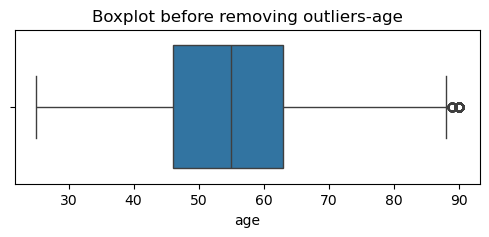

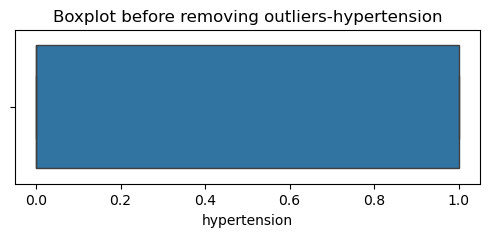

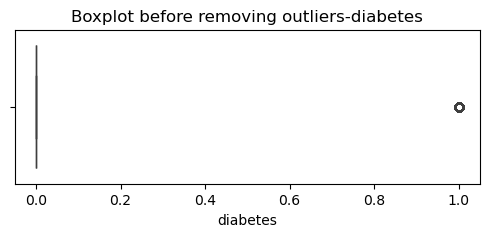

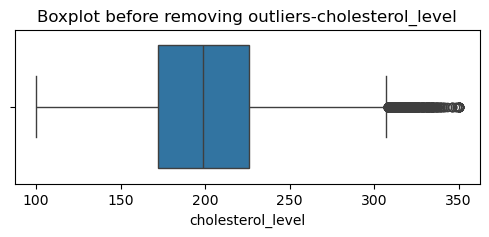

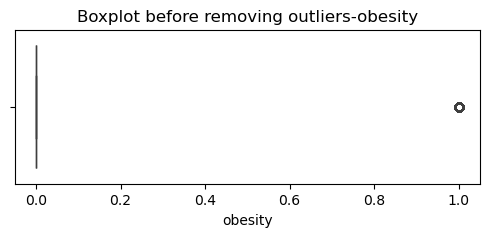

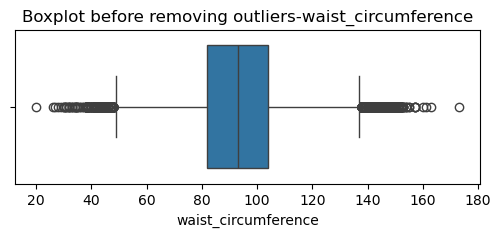

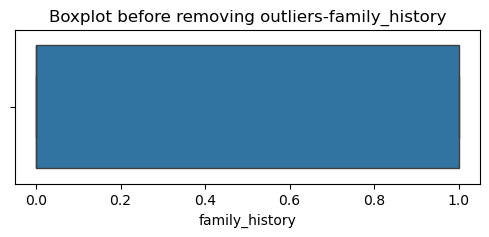

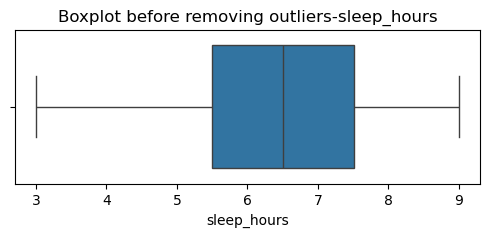

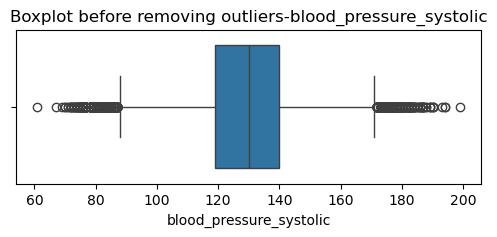

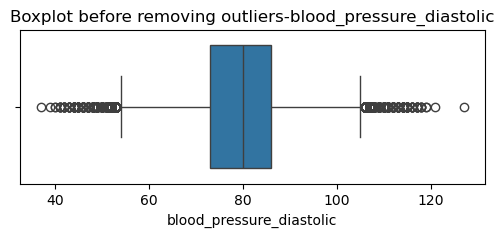

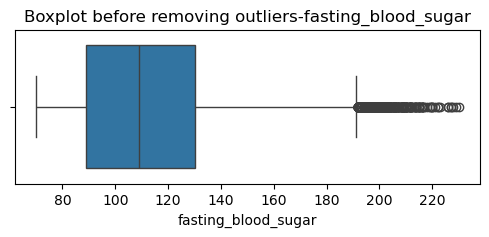

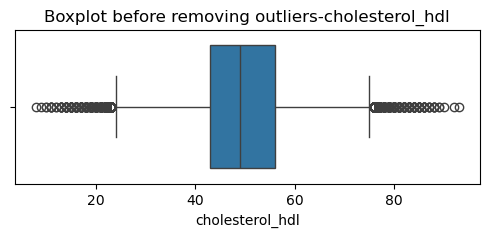

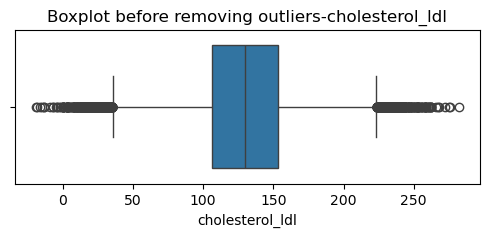

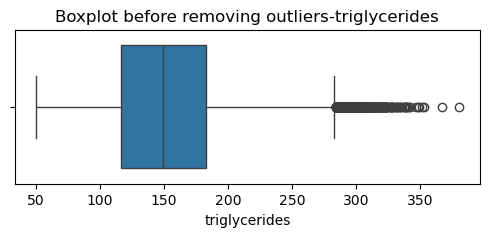

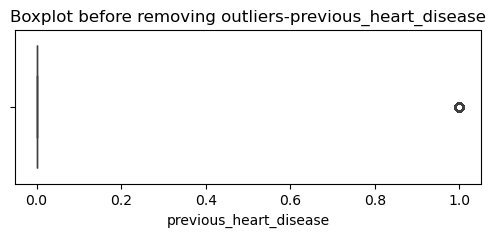

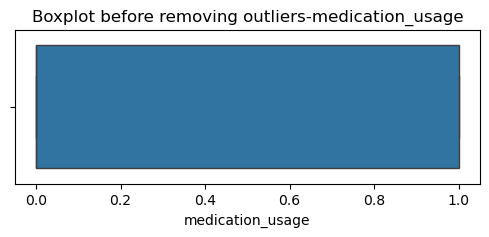

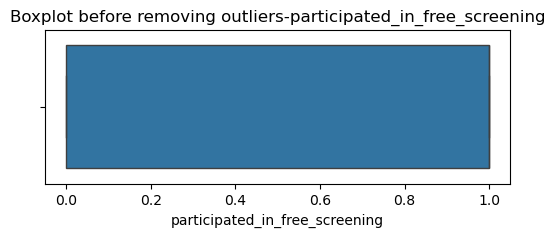

In [30]:
# Outlier Detection and Treatment
 # Visualise Outliers before removal using boxplots:
numeric_cols=df_encoded.select_dtypes(include=['int64','float64']).drop(columns=['heart_attack']).columns

print("\nChecking for outliers in numeric features...")

for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df_encoded[col])
    plt.title(f"Boxplot before removing outliers-{col}")
    plt.show()

In [31]:
# Optionally remove outliers using IQR( not removing in this ML model)
# for col in numeric_cols:
    # Q1 = df_encoded[col].quantile(0.25)
    # Q3 = df_encoded[col].quantile(0.75)
    # IQR = Q3 - Q1
    # lower = Q1 - 1.5 * IQR
    # upper = Q3 + 1.5 * IQR
    # df_encoded = df_encoded[(df_encoded[col] >= lower) & (df_encoded[col] <= upper)]

# Show shape after removing outliers
# print(f"\nShape after outlier removal: {df_encoded.shape}")


# In healthcare data:
# Outliers like very high blood pressure, extreme cholesterol, or unusually low sleep hours might actually be the key indicators of heart attack risk 
# — not data errors.

In [34]:
#Rechecking if encoding happened:
df_encoded.dtypes

age                                  int64
hypertension                         int64
diabetes                             int64
cholesterol_level                    int64
obesity                              int64
waist_circumference                  int64
family_history                       int64
sleep_hours                        float64
blood_pressure_systolic              int64
blood_pressure_diastolic             int64
fasting_blood_sugar                  int64
cholesterol_hdl                      int64
cholesterol_ldl                      int64
triglycerides                        int64
previous_heart_disease               int64
medication_usage                     int64
participated_in_free_screening       int64
heart_attack                         int64
gender_Male                           bool
region_Urban                          bool
income_level_Low                      bool
income_level_Middle                   bool
smoking_status_Never                  bool
smoking_sta

#### 2d) Feature Scaling

In [37]:
# Feature Scaling using Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [39]:
# Drop target column before scaling:

X=df_encoded.drop('heart_attack',axis=1)
y=df_encoded['heart_attack']


#### 2e) Creating Pipeline

In [42]:
# Create a pipeline to scale numeric columns:

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_scaled = pipeline.fit_transform(X)




#### 2f) Train/Test Split

In [45]:
# Import necessary Libraries:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

# Stratify ensures that both train and test sets have the same proportion of classes (0/1) as the original target

print("------ Preprocessing complete ------")

------ Preprocessing complete ------


## STAGE:3

### Model Building and Evaluation
### -----------------------------------------------------------------------------------------------------------------------------------

In [48]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    print(f"\nTraining and evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    results.append({"Model": name, "ROC-AUC": roc_auc})



Training and evaluating: Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.83      0.78     18971
           1       0.69      0.55      0.61     12700

    accuracy                           0.72     31671
   macro avg       0.71      0.69      0.69     31671
weighted avg       0.71      0.72      0.71     31671

Confusion Matrix:
[[15781  3190]
 [ 5745  6955]]
ROC-AUC Score: 0.7818

Training and evaluating: Decision Tree
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     18971
           1       0.55      0.56      0.56     12700

    accuracy                           0.64     31671
   macro avg       0.63      0.63      0.63     31671
weighted avg       0.64      0.64      0.64     31671

Confusion Matrix:
[[13212  5759]
 [ 5591  7109]]
ROC-AUC Score: 0.6281

Training and evaluating: Random Forest
              precision    recall  f1-score   support

           0       0.74

In [50]:
# Summary of model performance
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print("\nModel Performance Summary:")
print(results_df)



Model Performance Summary:
                 Model   ROC-AUC
4    Gradient Boosting  0.796617
2        Random Forest  0.787609
0  Logistic Regression  0.781774
3                  SVM  0.767209
1        Decision Tree  0.628098


### Hyperparameter Tuning (GridSearchCV)

#### Fine-tune the top model (Gradient Boosting) to improve accuracy and AUC:

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best ROC-AUC Score: 0.80130281551616
